<a href="https://colab.research.google.com/github/JuanFdoGf/MachineLearningProjects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
sns.set(style='whitegrid')

## Cargar el conjunto de datos

In [2]:
path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Path to dataset files:', path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 21.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


## Inspección y Exploración del conjunto de datos

In [3]:
train_path = os.path.join(path, 'Titanic-Dataset.csv')

df = pd.read_csv(train_path)

In [4]:
# Inspepcción de los datos
print('Primeras filas del dataset:')
print(df.head())

print('\nInformación general del dataset:')
print(df.info())

print('\nDescripción estadística del dataset:')
print(df.describe(include='all'))

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [5]:
# Verificar valores nulos
def missing_values_summary(df):
    missing_summary = df.isnull().sum()
    missing_summary = missing_summary[missing_summary > 0]
    return missing_summary.sort_values(ascending=False)

print('\nValores nulos por columna:')
print(missing_values_summary(df))


Valores nulos por columna:
Cabin       687
Age         177
Embarked      2
dtype: int64


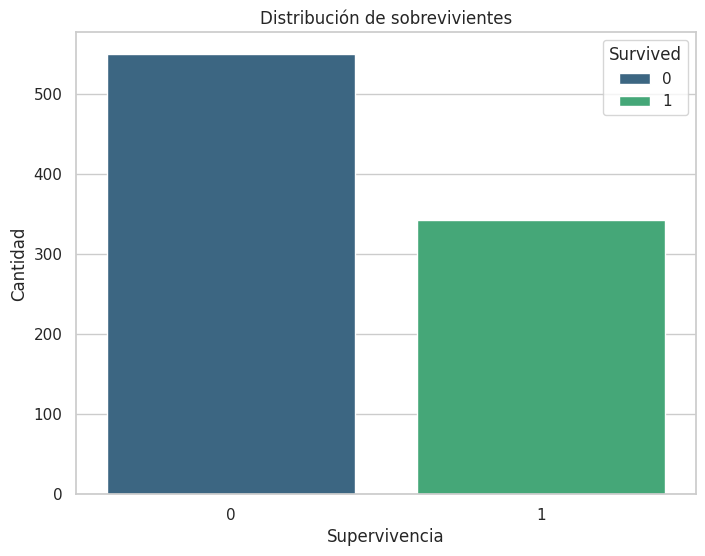

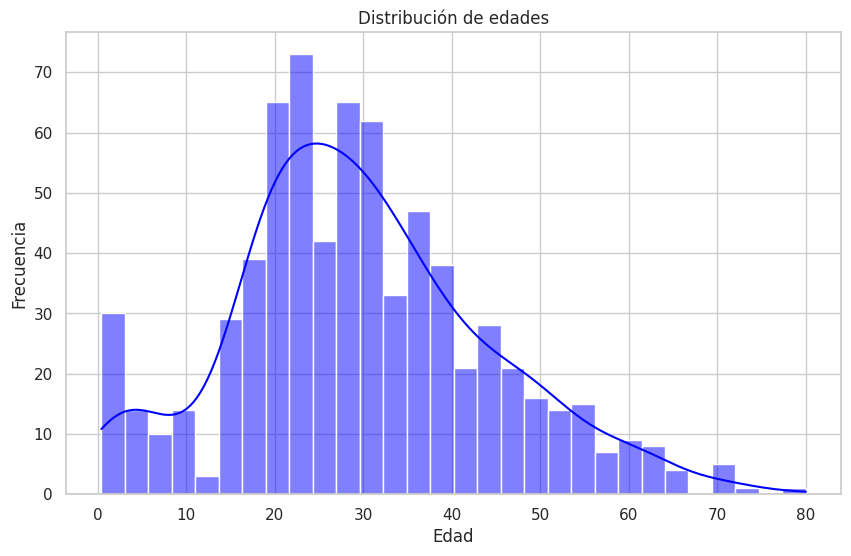

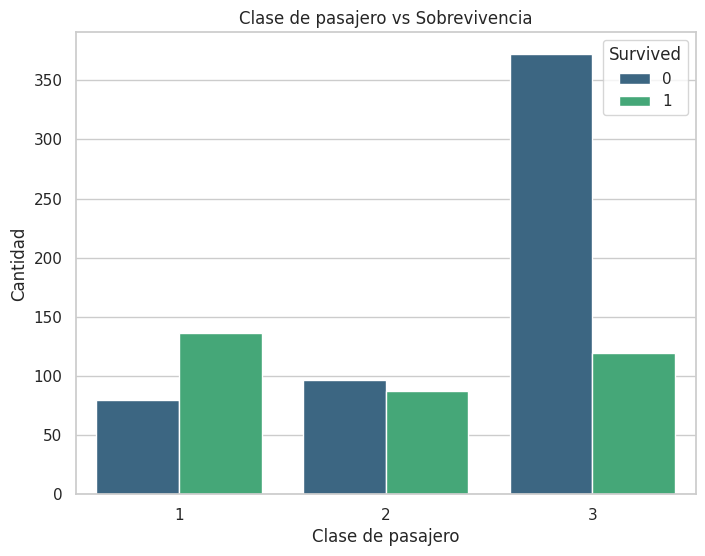

In [6]:
# Gráfico de sobrevivientes vs No sobrevivientes
plt.figure(figsize=(8, 6))
sns.countplot(data=df,
              x='Survived',
              hue= 'Survived',
              palette='viridis')
plt.title('Distribución de sobrevivientes')
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad')
plt.show()

# Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df,
             x='Age',
             bins=30,
             kde=True,
             color='blue')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre clase de pasajero y sobrevivencia
plt.figure(figsize=(8, 6))
sns.countplot(data=df,
              x='Pclass',
              hue='Survived',
              palette='viridis')
plt.title('Clase de pasajero vs Sobrevivencia')
plt.xlabel('Clase de pasajero')
plt.ylabel('Cantidad')
plt.show()

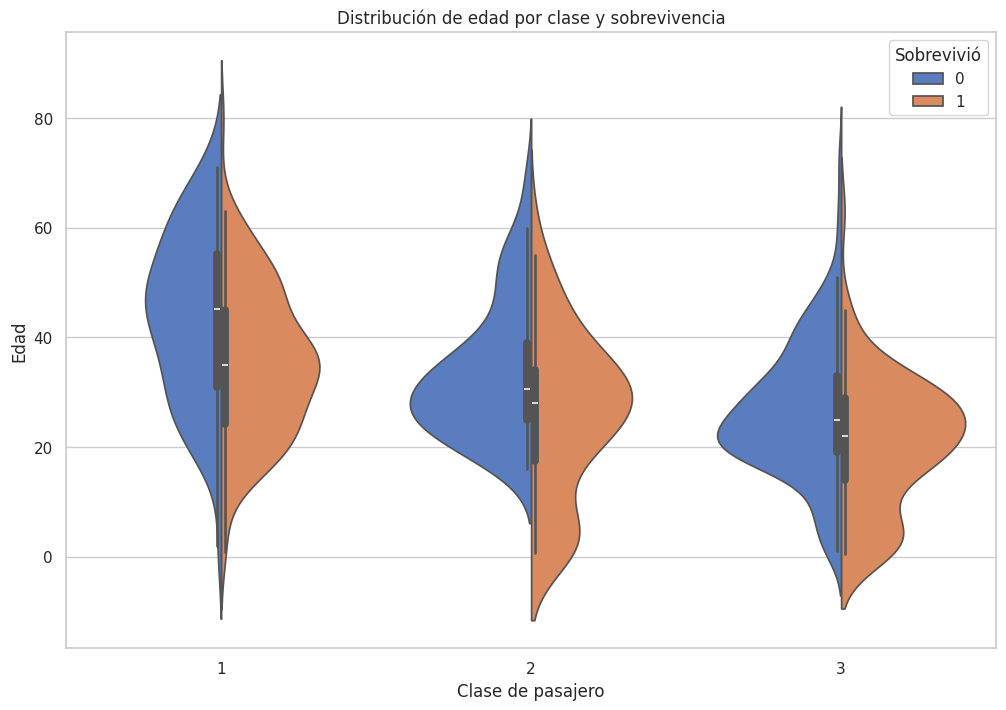

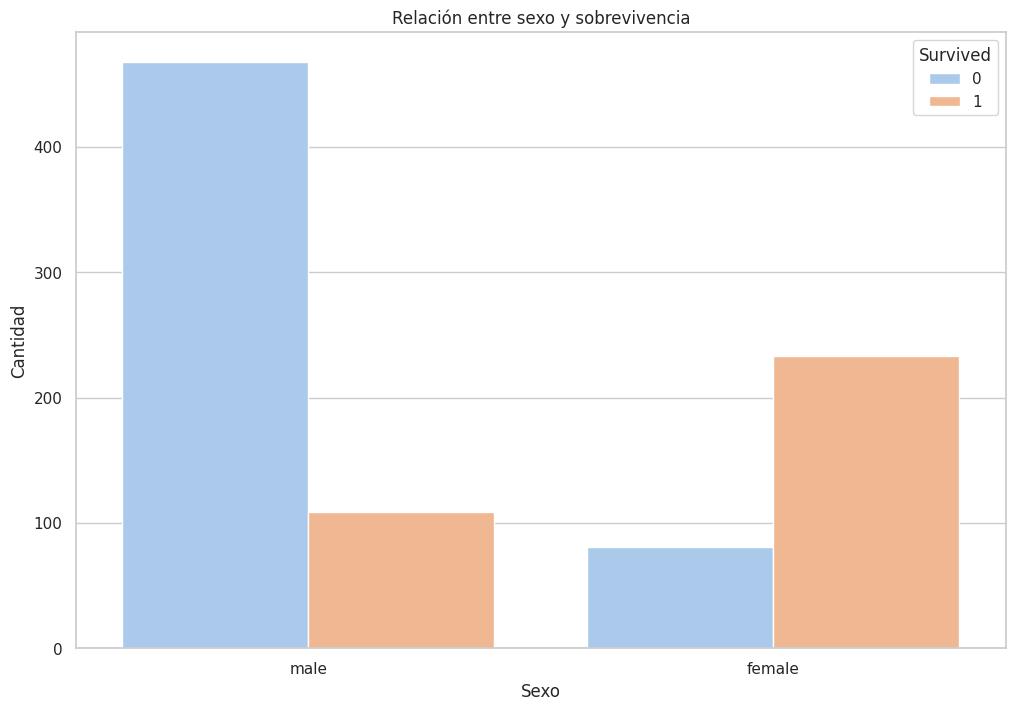

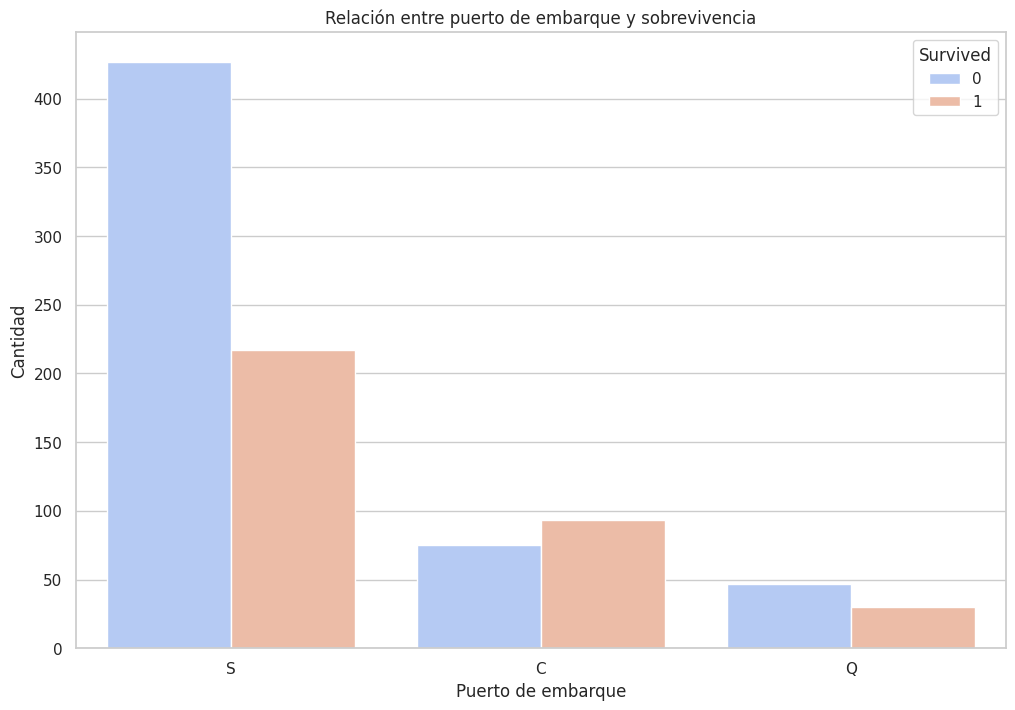

In [24]:
# Relación entre edad y clase respecto a sobrevivencia
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True, palette="muted")
plt.title("Distribución de edad por clase y sobrevivencia")
plt.xlabel("Clase de pasajero")
plt.ylabel("Edad")
plt.legend(title="Sobrevivió", loc="upper right")
plt.show()

# Relación entre sexo y embarque respecto a sobrevivencia
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Sex", hue="Survived", palette="pastel", dodge=True)
plt.title("Relación entre sexo y sobrevivencia")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Embarked", hue="Survived", palette="coolwarm", dodge=True)
plt.title("Relación entre puerto de embarque y sobrevivencia")
plt.xlabel("Puerto de embarque")
plt.ylabel("Cantidad")
plt.show()